In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau


Using TensorFlow backend.


In [2]:
# Chargement des données csv

import csv
filename = 'Data_Train_Foot.csv'
filename_test= 'Data_Test_Foot.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=';', quoting=csv.QUOTE_NONE)

data= pd.read_csv(filename,sep=";",index_col=0)

# y prend le score à prédire
y=data.score
# x prend les données à analyser
data.head()


,id_match,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,goalHomeTeam_FullTime,goalAwayTeam_FullTime,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam
0,267926,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,2.0,0,2,0,3,-1,-1,-1,-1,2409,6154
1,267922,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,2.0,0,0,0,2,-1,-1,-1,-1,4008,3054
2,267919,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,2.0,0,1,0,1,-1,-1,-1,-1,3029,100
3,267923,2019-08-10,522,530,OGC Nice,Amiens SC,1.0,1,0,2,1,-1,-1,-1,-1,2803,2045
4,267924,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,0.0,1,0,1,1,-1,-1,-1,-1,2156,1065


In [4]:
x=data[['puissance_homeTeam','puissance_awayTeam','win_cons_home','win_cons_away','lose_cons_home','lose_cons_away']]
x

,puissance_homeTeam,puissance_awayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away
0,2409,6154,-1,-1,-1,-1
1,4008,3054,-1,-1,-1,-1
2,3029,100,-1,-1,-1,-1
3,2803,2045,-1,-1,-1,-1
4,2156,1065,-1,-1,-1,-1
...,...,...,...,...,...,...
1585,100,6497,-1,1,-1,0
1586,100,100,1,-1,0,-1
1587,4858,5551,0,4,0,0
1588,651,2769,3,1,0,0


In [7]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['puissance_homeTeam','puissance_awayTeam','win_cons_home','win_cons_away','lose_cons_home','lose_cons_away']]
x_prediction

,puissance_homeTeam,puissance_awayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away
1590,2769,651,2,0,0,1
1591,4168,8036,0,1,1,0
1592,100,100,0,0,0,0
1593,1735,2478,0,0,0,0
1594,8164,3673,0,0,0,0
...,...,...,...,...,...,...
1714,6154,9319,1,2,0,0
1715,9770,7928,0,4,0,0
1716,9221,6821,1,0,0,0
1717,9495,7276,2,2,0,0


In [8]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
print(x_train.shape,y_train.shape)


(929, 6) (929,)


In [9]:
classes=np.unique(y_train)
nbClasses=len(classes)
epochs=200

nbClasses


3

In [10]:
x_train.shape[1]

6

In [11]:
def create_model():

    # define model Dylane
    model = Sequential()
    model.add(Dense(20, activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dropout(0.05))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))

    model.add(BatchNormalization())
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dropout(0.05))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))

    model.add(BatchNormalization())
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dropout(0.05))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))
    model.add(Dense(20,activation='relu',input_dim=x_train.shape[1]))


    model.add (Dense (3, activation='softmax'))
    #optimizer = keras.optimizers.SGD(learning_rate=0.00001, momentum=0.0, nesterov=False)
    #optimizer = SGD(lr=0.00001)
    optimizer=Adam(lr=0.01)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [12]:
def create_model2():
    
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=x_train.shape[1], kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='linear'))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.1))
    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(256,activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    
    
    model.add(Dense(256, activation='linear'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax'))

    #optm= Adam(lr=0.002, epsilon= 0.1)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001,epsilon=0.2),metrics=['accuracy'])
    
    return model

In [13]:
model = create_model2()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3

In [30]:
save = ModelCheckpoint('model_Foot.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)
result = model.fit(x_train, y_train,epochs=400,verbose=2,validation_data=(x_test, y_test),
                      callbacks=[save])

Train on 1032 samples, validate on 259 samples
Epoch 1/400

Epoch 00001: val_accuracy improved from -inf to 0.49421, saving model to model_Foot.h5
1032/1032 - 0s - loss: 0.9737 - accuracy: 0.5407 - val_loss: 1.0380 - val_accuracy: 0.4942
Epoch 2/400

Epoch 00002: val_accuracy did not improve from 0.49421
1032/1032 - 0s - loss: 0.9767 - accuracy: 0.5378 - val_loss: 1.0395 - val_accuracy: 0.4865
Epoch 3/400

Epoch 00003: val_accuracy did not improve from 0.49421
1032/1032 - 0s - loss: 0.9753 - accuracy: 0.5417 - val_loss: 1.0433 - val_accuracy: 0.4942
Epoch 4/400

Epoch 00004: val_accuracy did not improve from 0.49421
1032/1032 - 0s - loss: 0.9836 - accuracy: 0.5349 - val_loss: 1.0466 - val_accuracy: 0.4942
Epoch 5/400

Epoch 00005: val_accuracy did not improve from 0.49421
1032/1032 - 0s - loss: 0.9806 - accuracy: 0.5417 - val_loss: 1.0810 - val_accuracy: 0.4903
Epoch 6/400

Epoch 00006: val_accuracy did not improve from 0.49421
1032/1032 - 0s - loss: 0.9734 - accuracy: 0.5407 - val_los

Epoch 52/400

Epoch 00052: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9753 - accuracy: 0.5368 - val_loss: 1.0311 - val_accuracy: 0.4942
Epoch 53/400

Epoch 00053: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9818 - accuracy: 0.5281 - val_loss: 1.0301 - val_accuracy: 0.4903
Epoch 54/400

Epoch 00054: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9757 - accuracy: 0.5339 - val_loss: 1.0301 - val_accuracy: 0.4981
Epoch 55/400

Epoch 00055: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9720 - accuracy: 0.5436 - val_loss: 1.0463 - val_accuracy: 0.4981
Epoch 56/400

Epoch 00056: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9694 - accuracy: 0.5417 - val_loss: 1.0308 - val_accuracy: 0.4942
Epoch 57/400

Epoch 00057: val_accuracy did not improve from 0.49807
1032/1032 - 0s - loss: 0.9765 - accuracy: 0.5368 - val_loss: 1.0280 - val_accuracy: 0.4865
Epoch 58/400

Epoch 00058: val_accuracy 

Epoch 103/400

Epoch 00103: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9642 - accuracy: 0.5475 - val_loss: 1.0405 - val_accuracy: 0.4942
Epoch 104/400

Epoch 00104: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9772 - accuracy: 0.5349 - val_loss: 1.0456 - val_accuracy: 0.4942
Epoch 105/400

Epoch 00105: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9764 - accuracy: 0.5378 - val_loss: 1.0394 - val_accuracy: 0.4942
Epoch 106/400

Epoch 00106: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9751 - accuracy: 0.5368 - val_loss: 1.0420 - val_accuracy: 0.4942
Epoch 107/400

Epoch 00107: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9738 - accuracy: 0.5475 - val_loss: 1.0444 - val_accuracy: 0.4981
Epoch 108/400

Epoch 00108: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9682 - accuracy: 0.5417 - val_loss: 1.0541 - val_accuracy: 0.4903
Epoch 109/400

Epoch 00109: val_ac

Epoch 154/400

Epoch 00154: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9677 - accuracy: 0.5417 - val_loss: 1.0540 - val_accuracy: 0.4942
Epoch 155/400

Epoch 00155: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9769 - accuracy: 0.5359 - val_loss: 1.0360 - val_accuracy: 0.4942
Epoch 156/400

Epoch 00156: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9738 - accuracy: 0.5320 - val_loss: 1.0259 - val_accuracy: 0.4942
Epoch 157/400

Epoch 00157: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9746 - accuracy: 0.5320 - val_loss: 1.0209 - val_accuracy: 0.4903
Epoch 158/400

Epoch 00158: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9768 - accuracy: 0.5484 - val_loss: 1.0465 - val_accuracy: 0.4903
Epoch 159/400

Epoch 00159: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9703 - accuracy: 0.5436 - val_loss: 1.0278 - val_accuracy: 0.4942
Epoch 160/400

Epoch 00160: val_ac

Epoch 205/400

Epoch 00205: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9874 - accuracy: 0.5271 - val_loss: 1.0371 - val_accuracy: 0.4942
Epoch 206/400

Epoch 00206: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9869 - accuracy: 0.5271 - val_loss: 1.0225 - val_accuracy: 0.5019
Epoch 207/400

Epoch 00207: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9855 - accuracy: 0.5233 - val_loss: 1.0409 - val_accuracy: 0.4981
Epoch 208/400

Epoch 00208: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9863 - accuracy: 0.5223 - val_loss: 1.0332 - val_accuracy: 0.4865
Epoch 209/400

Epoch 00209: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9740 - accuracy: 0.5417 - val_loss: 1.0245 - val_accuracy: 0.4865
Epoch 210/400

Epoch 00210: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9734 - accuracy: 0.5436 - val_loss: 1.0386 - val_accuracy: 0.4942
Epoch 211/400

Epoch 00211: val_ac

Epoch 256/400

Epoch 00256: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9704 - accuracy: 0.5484 - val_loss: 1.0486 - val_accuracy: 0.5019
Epoch 257/400

Epoch 00257: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9692 - accuracy: 0.5417 - val_loss: 1.0251 - val_accuracy: 0.4942
Epoch 258/400

Epoch 00258: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9762 - accuracy: 0.5359 - val_loss: 1.0229 - val_accuracy: 0.5019
Epoch 259/400

Epoch 00259: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9734 - accuracy: 0.5417 - val_loss: 1.0233 - val_accuracy: 0.4942
Epoch 260/400

Epoch 00260: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9739 - accuracy: 0.5368 - val_loss: 1.0380 - val_accuracy: 0.4865
Epoch 261/400

Epoch 00261: val_accuracy did not improve from 0.50193
1032/1032 - 0s - loss: 0.9679 - accuracy: 0.5475 - val_loss: 1.0299 - val_accuracy: 0.4903
Epoch 262/400

Epoch 00262: val_ac

Epoch 307/400

Epoch 00307: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9666 - accuracy: 0.5426 - val_loss: 1.0345 - val_accuracy: 0.4981
Epoch 308/400

Epoch 00308: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9705 - accuracy: 0.5426 - val_loss: 1.0211 - val_accuracy: 0.4942
Epoch 309/400

Epoch 00309: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9716 - accuracy: 0.5494 - val_loss: 1.0381 - val_accuracy: 0.4981
Epoch 310/400

Epoch 00310: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9684 - accuracy: 0.5436 - val_loss: 1.0973 - val_accuracy: 0.4903
Epoch 311/400

Epoch 00311: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9743 - accuracy: 0.5397 - val_loss: 1.0525 - val_accuracy: 0.5058
Epoch 312/400

Epoch 00312: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9664 - accuracy: 0.5446 - val_loss: 1.0422 - val_accuracy: 0.4942
Epoch 313/400

Epoch 00313: val_ac

Epoch 358/400

Epoch 00358: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9684 - accuracy: 0.5504 - val_loss: 1.0354 - val_accuracy: 0.5019
Epoch 359/400

Epoch 00359: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9740 - accuracy: 0.5310 - val_loss: 1.0422 - val_accuracy: 0.4981
Epoch 360/400

Epoch 00360: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9728 - accuracy: 0.5388 - val_loss: 1.0359 - val_accuracy: 0.4903
Epoch 361/400

Epoch 00361: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9719 - accuracy: 0.5436 - val_loss: 1.0172 - val_accuracy: 0.5019
Epoch 362/400

Epoch 00362: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9696 - accuracy: 0.5523 - val_loss: 1.0415 - val_accuracy: 0.4981
Epoch 363/400

Epoch 00363: val_accuracy did not improve from 0.50579
1032/1032 - 0s - loss: 0.9681 - accuracy: 0.5388 - val_loss: 1.0429 - val_accuracy: 0.4981
Epoch 364/400

Epoch 00364: val_ac

Text(0, 0.5, 'Accuracy')

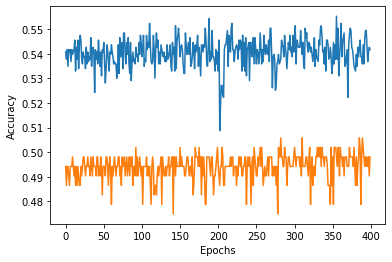

In [31]:
plt.plot(result.history['accuracy'],label='Accuracy')#bleu
plt.plot(result.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [32]:
predictions = model.predict((x_test, y_test))

In [45]:
predictions[11]

NameError: name 'predictions' is not defined

## Modèle 2

In [14]:
save = ModelCheckpoint('model_FootV2.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)
result2 = model.fit(x_train, y_train,epochs=600,verbose=2,validation_data=(x_test, y_test),
                      callbacks=[save])

Train on 929 samples, validate on 233 samples
Epoch 1/600

Epoch 00001: val_accuracy improved from -inf to 0.24464, saving model to model_FootV2.h5
929/929 - 3s - loss: 1.5656 - accuracy: 0.3175 - val_loss: 2.3980 - val_accuracy: 0.2446
Epoch 2/600

Epoch 00002: val_accuracy improved from 0.24464 to 0.27039, saving model to model_FootV2.h5
929/929 - 0s - loss: 1.4457 - accuracy: 0.3326 - val_loss: 1.7125 - val_accuracy: 0.2704
Epoch 3/600

Epoch 00003: val_accuracy improved from 0.27039 to 0.28755, saving model to model_FootV2.h5
929/929 - 0s - loss: 1.4179 - accuracy: 0.3724 - val_loss: 1.4377 - val_accuracy: 0.2876
Epoch 4/600

Epoch 00004: val_accuracy improved from 0.28755 to 0.34764, saving model to model_FootV2.h5
929/929 - 0s - loss: 1.3970 - accuracy: 0.3854 - val_loss: 1.2641 - val_accuracy: 0.3476
Epoch 5/600

Epoch 00005: val_accuracy improved from 0.34764 to 0.39914, saving model to model_FootV2.h5
929/929 - 0s - loss: 1.3151 - accuracy: 0.4037 - val_loss: 1.1568 - val_accu

Epoch 51/600

Epoch 00051: val_accuracy did not improve from 0.47210
929/929 - 0s - loss: 1.0829 - accuracy: 0.4553 - val_loss: 1.0601 - val_accuracy: 0.4549
Epoch 52/600

Epoch 00052: val_accuracy did not improve from 0.47210
929/929 - 0s - loss: 1.0856 - accuracy: 0.4456 - val_loss: 1.0654 - val_accuracy: 0.4678
Epoch 53/600

Epoch 00053: val_accuracy improved from 0.47210 to 0.47639, saving model to model_FootV2.h5
929/929 - 0s - loss: 1.0835 - accuracy: 0.4672 - val_loss: 1.0533 - val_accuracy: 0.4764
Epoch 54/600

Epoch 00054: val_accuracy did not improve from 0.47639
929/929 - 0s - loss: 1.0700 - accuracy: 0.4586 - val_loss: 1.0555 - val_accuracy: 0.4549
Epoch 55/600

Epoch 00055: val_accuracy did not improve from 0.47639
929/929 - 0s - loss: 1.1006 - accuracy: 0.4403 - val_loss: 1.0485 - val_accuracy: 0.4721
Epoch 56/600

Epoch 00056: val_accuracy did not improve from 0.47639
929/929 - 0s - loss: 1.0592 - accuracy: 0.4543 - val_loss: 1.0492 - val_accuracy: 0.4678
Epoch 57/600

E

Epoch 102/600

Epoch 00102: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 1.0191 - accuracy: 0.4865 - val_loss: 1.0317 - val_accuracy: 0.4936
Epoch 103/600

Epoch 00103: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 1.0512 - accuracy: 0.4726 - val_loss: 1.0366 - val_accuracy: 0.4936
Epoch 104/600

Epoch 00104: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 1.0250 - accuracy: 0.4930 - val_loss: 1.0375 - val_accuracy: 0.4979
Epoch 105/600

Epoch 00105: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 1.0396 - accuracy: 0.4898 - val_loss: 1.0383 - val_accuracy: 0.4936
Epoch 106/600

Epoch 00106: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 1.0492 - accuracy: 0.4553 - val_loss: 1.0422 - val_accuracy: 0.4893
Epoch 107/600

Epoch 00107: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 1.0283 - accuracy: 0.4855 - val_loss: 1.0451 - val_accuracy: 0.4807
Epoch 108/600

Epoch 00108: val_accuracy did n

Epoch 154/600

Epoch 00154: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 1.0300 - accuracy: 0.4898 - val_loss: 1.0382 - val_accuracy: 0.4979
Epoch 155/600

Epoch 00155: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 1.0101 - accuracy: 0.5102 - val_loss: 1.0364 - val_accuracy: 0.4850
Epoch 156/600

Epoch 00156: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 1.0062 - accuracy: 0.5048 - val_loss: 1.0401 - val_accuracy: 0.5021
Epoch 157/600

Epoch 00157: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9913 - accuracy: 0.4930 - val_loss: 1.0442 - val_accuracy: 0.4936
Epoch 158/600

Epoch 00158: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9902 - accuracy: 0.4952 - val_loss: 1.0443 - val_accuracy: 0.4893
Epoch 159/600

Epoch 00159: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9925 - accuracy: 0.4995 - val_loss: 1.0469 - val_accuracy: 0.4807
Epoch 160/600

Epoch 00160: val_accuracy did n

Epoch 206/600

Epoch 00206: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9932 - accuracy: 0.5070 - val_loss: 1.0380 - val_accuracy: 0.4936
Epoch 207/600

Epoch 00207: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9874 - accuracy: 0.5113 - val_loss: 1.0376 - val_accuracy: 0.4936
Epoch 208/600

Epoch 00208: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9766 - accuracy: 0.5350 - val_loss: 1.0361 - val_accuracy: 0.4936
Epoch 209/600

Epoch 00209: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9846 - accuracy: 0.5285 - val_loss: 1.0407 - val_accuracy: 0.4893
Epoch 210/600

Epoch 00210: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9980 - accuracy: 0.5059 - val_loss: 1.0399 - val_accuracy: 0.4893
Epoch 211/600

Epoch 00211: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9874 - accuracy: 0.5124 - val_loss: 1.0361 - val_accuracy: 0.4850
Epoch 212/600

Epoch 00212: val_accuracy did n

Epoch 258/600

Epoch 00258: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9909 - accuracy: 0.5005 - val_loss: 1.0352 - val_accuracy: 0.4764
Epoch 259/600

Epoch 00259: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9886 - accuracy: 0.5005 - val_loss: 1.0341 - val_accuracy: 0.4807
Epoch 260/600

Epoch 00260: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9900 - accuracy: 0.5210 - val_loss: 1.0343 - val_accuracy: 0.4893
Epoch 261/600

Epoch 00261: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9795 - accuracy: 0.5145 - val_loss: 1.0352 - val_accuracy: 0.4850
Epoch 262/600

Epoch 00262: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9899 - accuracy: 0.5135 - val_loss: 1.0364 - val_accuracy: 0.4850
Epoch 263/600

Epoch 00263: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9824 - accuracy: 0.5081 - val_loss: 1.0375 - val_accuracy: 0.4850
Epoch 264/600

Epoch 00264: val_accuracy did n

Epoch 310/600

Epoch 00310: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9903 - accuracy: 0.5253 - val_loss: 1.0318 - val_accuracy: 0.4850
Epoch 311/600

Epoch 00311: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9769 - accuracy: 0.5188 - val_loss: 1.0325 - val_accuracy: 0.4807
Epoch 312/600

Epoch 00312: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9647 - accuracy: 0.5307 - val_loss: 1.0328 - val_accuracy: 0.4807
Epoch 313/600

Epoch 00313: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9857 - accuracy: 0.5070 - val_loss: 1.0298 - val_accuracy: 0.4850
Epoch 314/600

Epoch 00314: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9814 - accuracy: 0.5167 - val_loss: 1.0306 - val_accuracy: 0.4893
Epoch 315/600

Epoch 00315: val_accuracy did not improve from 0.50215
929/929 - 0s - loss: 0.9829 - accuracy: 0.5253 - val_loss: 1.0301 - val_accuracy: 0.4936
Epoch 316/600

Epoch 00316: val_accuracy did n

Epoch 362/600

Epoch 00362: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9958 - accuracy: 0.5135 - val_loss: 1.0349 - val_accuracy: 0.4979
Epoch 363/600

Epoch 00363: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9827 - accuracy: 0.5221 - val_loss: 1.0337 - val_accuracy: 0.5021
Epoch 364/600

Epoch 00364: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9750 - accuracy: 0.5371 - val_loss: 1.0329 - val_accuracy: 0.4979
Epoch 365/600

Epoch 00365: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9789 - accuracy: 0.5264 - val_loss: 1.0369 - val_accuracy: 0.4807
Epoch 366/600

Epoch 00366: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9709 - accuracy: 0.5199 - val_loss: 1.0379 - val_accuracy: 0.4893
Epoch 367/600

Epoch 00367: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9669 - accuracy: 0.5339 - val_loss: 1.0370 - val_accuracy: 0.4807
Epoch 368/600

Epoch 00368: val_accuracy did n

Epoch 414/600

Epoch 00414: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9738 - accuracy: 0.5231 - val_loss: 1.0332 - val_accuracy: 0.4893
Epoch 415/600

Epoch 00415: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9712 - accuracy: 0.5242 - val_loss: 1.0305 - val_accuracy: 0.4936
Epoch 416/600

Epoch 00416: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9762 - accuracy: 0.5210 - val_loss: 1.0298 - val_accuracy: 0.4893
Epoch 417/600

Epoch 00417: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9630 - accuracy: 0.5339 - val_loss: 1.0302 - val_accuracy: 0.4893
Epoch 418/600

Epoch 00418: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9687 - accuracy: 0.5414 - val_loss: 1.0306 - val_accuracy: 0.4936
Epoch 419/600

Epoch 00419: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9706 - accuracy: 0.5231 - val_loss: 1.0326 - val_accuracy: 0.4979
Epoch 420/600

Epoch 00420: val_accuracy did n

Epoch 466/600

Epoch 00466: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9755 - accuracy: 0.5318 - val_loss: 1.0434 - val_accuracy: 0.4807
Epoch 467/600

Epoch 00467: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9734 - accuracy: 0.5145 - val_loss: 1.0445 - val_accuracy: 0.4850
Epoch 468/600

Epoch 00468: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9657 - accuracy: 0.5199 - val_loss: 1.0416 - val_accuracy: 0.4893
Epoch 469/600

Epoch 00469: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9771 - accuracy: 0.5318 - val_loss: 1.0429 - val_accuracy: 0.4893
Epoch 470/600

Epoch 00470: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9692 - accuracy: 0.5307 - val_loss: 1.0420 - val_accuracy: 0.4893
Epoch 471/600

Epoch 00471: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9656 - accuracy: 0.5468 - val_loss: 1.0436 - val_accuracy: 0.4936
Epoch 472/600

Epoch 00472: val_accuracy did n

Epoch 518/600

Epoch 00518: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9709 - accuracy: 0.5307 - val_loss: 1.0371 - val_accuracy: 0.5021
Epoch 519/600

Epoch 00519: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9840 - accuracy: 0.5199 - val_loss: 1.0373 - val_accuracy: 0.4979
Epoch 520/600

Epoch 00520: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9643 - accuracy: 0.5274 - val_loss: 1.0335 - val_accuracy: 0.4893
Epoch 521/600

Epoch 00521: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9639 - accuracy: 0.5231 - val_loss: 1.0340 - val_accuracy: 0.4893
Epoch 522/600

Epoch 00522: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9638 - accuracy: 0.5361 - val_loss: 1.0366 - val_accuracy: 0.4893
Epoch 523/600

Epoch 00523: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9775 - accuracy: 0.5210 - val_loss: 1.0386 - val_accuracy: 0.4893
Epoch 524/600

Epoch 00524: val_accuracy did n

Epoch 570/600

Epoch 00570: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9670 - accuracy: 0.5210 - val_loss: 1.0374 - val_accuracy: 0.4936
Epoch 571/600

Epoch 00571: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9716 - accuracy: 0.5285 - val_loss: 1.0345 - val_accuracy: 0.4850
Epoch 572/600

Epoch 00572: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9668 - accuracy: 0.5296 - val_loss: 1.0352 - val_accuracy: 0.4850
Epoch 573/600

Epoch 00573: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9740 - accuracy: 0.5145 - val_loss: 1.0352 - val_accuracy: 0.4850
Epoch 574/600

Epoch 00574: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9685 - accuracy: 0.5285 - val_loss: 1.0424 - val_accuracy: 0.4764
Epoch 575/600

Epoch 00575: val_accuracy did not improve from 0.51073
929/929 - 0s - loss: 0.9797 - accuracy: 0.5167 - val_loss: 1.0415 - val_accuracy: 0.4764
Epoch 576/600

Epoch 00576: val_accuracy did n

### Graphique 

Text(0, 0.5, 'Accuracy')

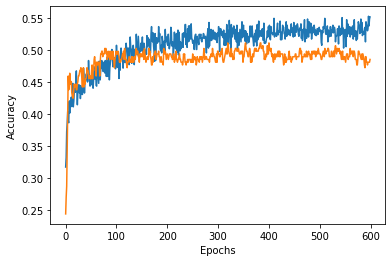

In [15]:
plt.plot(result2.history['accuracy'],label='Accuracy')#bleu
plt.plot(result2.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

#### Le graphique ci dessous montre le résultat avant réduction de 10% de la quantité de données. Le problème vient donc de la quantité

Text(0, 0.5, 'Accuracy')

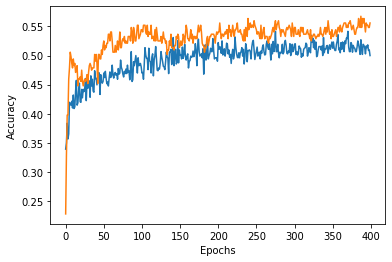

In [12]:
plt.plot(result2.history['accuracy'],label='Accuracy')#bleu
plt.plot(result2.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

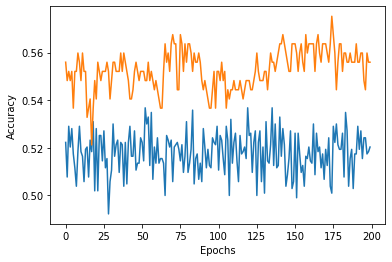

In [14]:
plt.plot(result2.history['accuracy'],label='Accuracy')#bleu
plt.plot(result2.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Après avoir testé avec 2000 époques, la limite du modèle est bien à 57%. Un besoin de donnée est requis pour aller au délà.

## Prédictions

In [53]:
unique = data_test.values
results = []
equal = []
victory = []
loss = []
i = 0

In [54]:
unique[1]

array([278637, '2019-08-13', 842, 851, 'FK Dynamo Kyiv', 'Club Brugge KV',
       0.0, 1, 1, 3, 3, 0, 1, 1, 0, 4168, 8036], dtype=object)

In [55]:
for i in unique:
    puissance_homeTeam = i[15]
    puissance_awayTeam = i[16]
    win_cons_home = i[11]
    win_cons_away = i[12]
    lose_cons_home = i[13]
    lose_cons_away= i[14]
    predictions_final = model.predict(np.array([[puissance_homeTeam,puissance_awayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away]])) # predictions avec puissance de teams au hasard
    egalite = predictions_final[0][0]*100
    victoire = predictions_final[0][1]*100
    perte = predictions_final[0][2]*100
    result = np.argmax(predictions_final)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)

In [56]:
df4 = {'date':data_test.date,'id_HomeTeam':data_test.idHomeTeam,'id_AwayTeam':data_test.idAwayTeam,
      'homeTeam':data_test.homeTeam,'AwayTeam':data_test.awayTeam,'prediction_egalité':equal,
      'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}
df4 = pd.DataFrame(df4)
df4

,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
1590,2019-08-13,889,734,Rosenborg BK,NK Maribor,19.471164,46.970594,33.558241,1
1591,2019-08-13,842,851,FK Dynamo Kyiv,Club Brugge KV,34.237587,24.086177,41.676232,2
1592,2019-08-13,1876,7283,FC København,FK Crvena Zvezda,27.826092,38.450611,33.723292,1
1593,2019-08-13,5954,755,Ferencvárosi TC,GNK Dinamo Zagreb,22.890788,39.711070,37.398142,1
1594,2019-08-13,678,6146,AFC Ajax,PAOK FC,33.823007,55.937856,10.239136,1
...,...,...,...,...,...,...,...,...,...
1714,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,32.313189,37.073603,30.613205,1
1715,2020-03-10,95,102,Valencia CF,Atalanta BC,63.142896,29.394546,7.462560,0
1716,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,45.798200,44.951975,9.249821,0
1717,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,51.464832,39.882362,8.652805,0


In [38]:
df[1000:1050]

,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
1303,2019-12-21,108,107,FC Internazionale Milano,Genoa CFC,0.000391,0.115269,99.884331,2
1304,2019-12-21,586,1107,Torino FC,SPAL 2013,1.130512,0.684727,98.184752,2
1305,2019-12-22,102,98,Atalanta BC,AC Milan,0.002482,0.015043,99.982482,2
1306,2019-12-22,112,449,Parma Calcio 1913,Brescia Calcio,25.165024,37.262091,37.572885,2
1307,2019-12-22,5890,103,US Lecce,Bologna FC 1909,9.465440,9.631936,80.902618,2
1308,2019-12-22,471,113,US Sassuolo Calcio,SSC Napoli,2.529644,3.539249,93.931109,2
1309,2020-01-05,449,110,Brescia Calcio,SS Lazio,2.770965,1.218905,96.010137,2
1310,2020-01-05,1107,450,SPAL 2013,Hellas Verona FC,3.942577,2.202238,93.855190,2
1311,2020-01-05,107,471,Genoa CFC,US Sassuolo Calcio,3.461966,1.624944,94.913095,2
1312,2020-01-05,100,586,AS Roma,Torino FC,0.015198,0.046418,99.938381,2
